<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/palayankottai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/politi.xlsx')
df.head()

,Timestamp,Location,Area,Assembly,Gender,Whom would you like to see as the PM in 2024?,How is the current Tamil Nadu government ruling?,Would you benefit from the central government schemes?
0,2023/10/29 12:31:27 pm GMT+5:30,Rural,Palavoor,Radhapuram,Female,Modi,Moderate,Maybe
1,2023/10/29 1:21:29 pm GMT+5:30,Rural,Palavoor,Radhapuram,Male,Modi,Bad,Yes
2,2023/10/29 1:21:48 pm GMT+5:30,Rural,Palavoor,Radhapuram,Male,Modi,Bad,Yes
3,2023/10/29 1:22:07 pm GMT+5:30,Rural,Palavoor,Radhapuram,Male,Modi,Bad,Yes
4,2023/10/29 1:22:28 pm GMT+5:30,Rural,Palavoor,Radhapuram,Male,Modi,Bad,Yes


In [ ]:
df.shape

(1741, 8)

In [ ]:
palayankottai_count = df[df['Assembly'] == 'Palayankottai'].shape[0]
print("Number of data in 'Palayankottai':", palayankottai_count)

Number of data in 'Palayankottai': 630


In [ ]:
df.drop(['Timestamp'], axis=1,inplace=True)

In [ ]:
df[df['Assembly'] == 'Palayankottai']['Gender'].value_counts()

Male            423
Female          205
Trans Gender      2
Name: Gender, dtype: int64

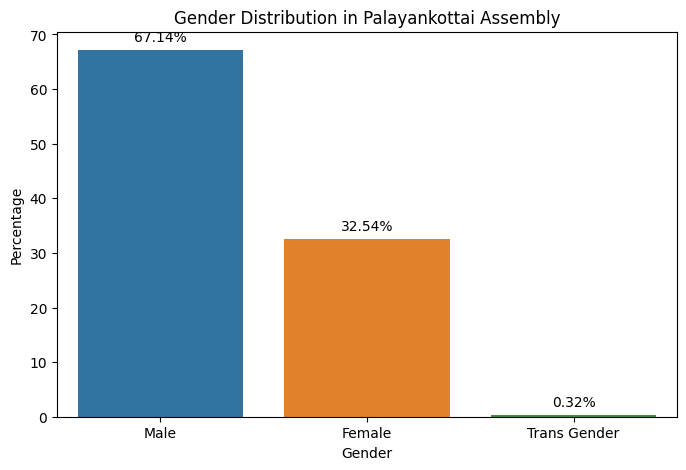

In [ ]:
palayankottai_df = df[df['Assembly'] == 'Palayankottai']

gender_counts = palayankottai_df['Gender'].value_counts()

gender_percentages = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution in Palayankottai Assembly')

for i, percentage in enumerate(gender_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
df[df['Assembly'] == 'Palayankottai']['Location'].value_counts()

Urban    630
Name: Location, dtype: int64

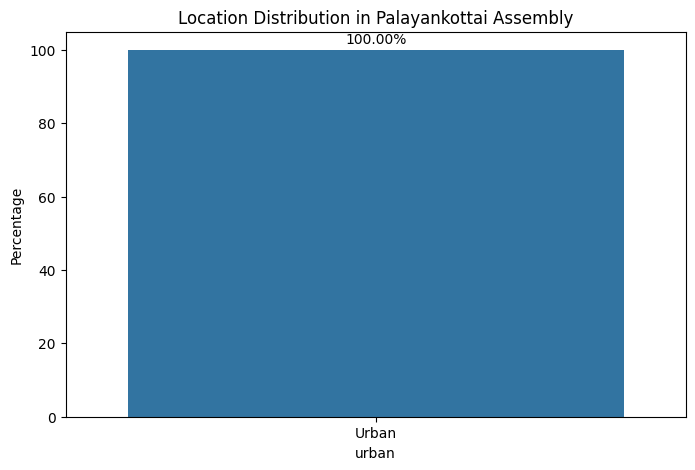

In [ ]:
palayankottai_df = df[df['Assembly'] == 'Palayankottai']

gender_counts = palayankottai_df['Location'].value_counts()

gender_percentages = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

plt.xlabel('urban')
plt.ylabel('Percentage')
plt.title('Location Distribution in Palayankottai Assembly')

for i, percentage in enumerate(gender_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
df[df['Assembly'] == 'Palayankottai']['Whom would you like to see as the PM in 2024?'].value_counts()

ADMK             250
I.N.D.I.A+ALL    210
Modi             151
AMMK+OPS          14
NTK                5
Name: Whom would you like to see as the PM in 2024?, dtype: int64

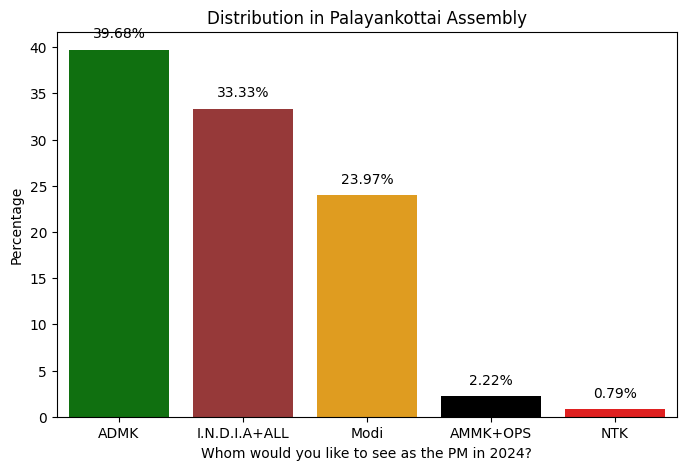

In [ ]:
palayankottai_df = df[df['Assembly'] == 'Palayankottai']

custom_palette = {'I.N.D.I.A+ALL': 'brown','ADMK': 'green','Modi': 'orange','AMMK+OPS': 'black','NTK': 'red'}

pm_counts = palayankottai_df['Whom would you like to see as the PM in 2024?'].value_counts()
pm_percentages = pm_counts / pm_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=pm_percentages.index, y=pm_percentages.values, palette=[custom_palette[pm] for pm in pm_percentages.index])

plt.xlabel('Whom would you like to see as the PM in 2024?')
plt.ylabel('Percentage')
plt.title('Distribution in Palayankottai Assembly')

for i, percentage in enumerate(pm_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
df[df['Assembly'] == 'Palayankottai']['Would you benefit from the central government schemes?'].value_counts()

No       333
Yes      194
Maybe    103
Name: Would you benefit from the central government schemes?, dtype: int64

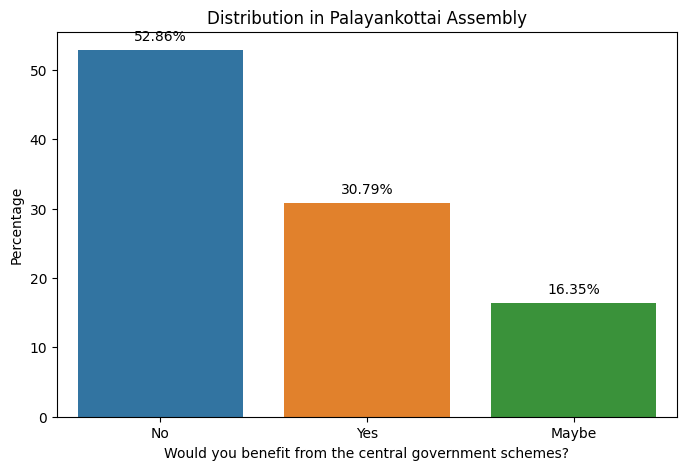

In [ ]:
palayankottai_df = df[df['Assembly'] == 'Palayankottai']

gender_counts = palayankottai_df['Would you benefit from the central government schemes?'].value_counts()

gender_percentages = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

plt.xlabel('Would you benefit from the central government schemes?')
plt.ylabel('Percentage')
plt.title('Distribution in Palayankottai Assembly')

for i, percentage in enumerate(gender_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
df[df['Assembly'] == 'Palayankottai']['How is the current Tamil Nadu government ruling?'].value_counts()

Bad         420
Good        171
Moderate     39
Name: How is the current Tamil Nadu government ruling?, dtype: int64

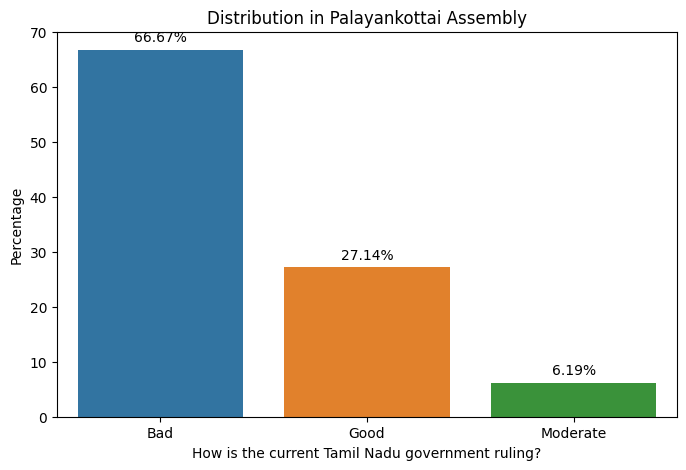

In [ ]:
palayankottai_df = df[df['Assembly'] == 'Palayankottai']

gender_counts = palayankottai_df['How is the current Tamil Nadu government ruling?'].value_counts()

gender_percentages = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

plt.xlabel('How is the current Tamil Nadu government ruling?')
plt.ylabel('Percentage')
plt.title('Distribution in Palayankottai Assembly')

for i, percentage in enumerate(gender_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
def count_candidate_voters(df, assembly, location, candidate):
    voters = df[(df['Assembly'] == assembly) & (df['Location'] == location) & (df['Whom would you like to see as the PM in 2024?'] == candidate)]
    return len(voters)

locations = ['Rural', 'Urban']
candidates = ['I.N.D.I.A+ALL', 'Modi', 'ADMK', 'AMMK+OPS', 'NTK']
assembly = 'Palayankottai'

for location in locations:
    for candidate in candidates:
        count = count_candidate_voters(df, assembly, location, candidate)
        print(f"The number of people likely to vote for {candidate} in {location} areas of {assembly} assembly is: {count}")
        print()


The number of people likely to vote for I.N.D.I.A+ALL in Rural areas of Palayankottai assembly is: 0

The number of people likely to vote for Modi in Rural areas of Palayankottai assembly is: 0

The number of people likely to vote for ADMK in Rural areas of Palayankottai assembly is: 0

The number of people likely to vote for AMMK+OPS in Rural areas of Palayankottai assembly is: 0

The number of people likely to vote for NTK in Rural areas of Palayankottai assembly is: 0

The number of people likely to vote for I.N.D.I.A+ALL in Urban areas of Palayankottai assembly is: 210

The number of people likely to vote for Modi in Urban areas of Palayankottai assembly is: 151

The number of people likely to vote for ADMK in Urban areas of Palayankottai assembly is: 250

The number of people likely to vote for AMMK+OPS in Urban areas of Palayankottai assembly is: 14

The number of people likely to vote for NTK in Urban areas of Palayankottai assembly is: 5



In [ ]:
preferences = ['I.N.D.I.A+ALL', 'Modi', 'ADMK', 'AMMK_OPS', 'NTK']
assembly = 'Palayankottai'

max_votes = 0
winning_preference = ''

for preference in preferences:
    preference_voters_grouped = df[(df['Whom would you like to see as the PM in 2024?'] == preference) & (df['Assembly'] == assembly)].groupby(['Location', 'Gender']).size().reset_index(name='Count')

    total_votes = preference_voters_grouped['Count'].sum()

    if total_votes > max_votes:
        max_votes = total_votes
        winning_preference = preference

print(f"The preference that received the highest number of votes in {assembly} assembly is: {winning_preference}")
print(f"The total number of votes for the winning preference is: {max_votes}")


The preference that received the highest number of votes in Palayankottai assembly is: ADMK
The total number of votes for the winning preference is: 250


In [ ]:

area_modi_voters = df[(df['Assembly'] == 'Palayankottai') & (df['Whom would you like to see as the PM in 2024?'] == 'Modi')]

male_modi_voters = len(area_modi_voters[area_modi_voters['Gender'] == 'Male'])
female_modi_voters = len(area_modi_voters[area_modi_voters['Gender'] == 'Female'])

target_area = 'Palayankottai'

print(f"The number of male voters who like to vote for Modi in {target_area} is: {male_modi_voters}")
print(f"The number of female voters who like to vote for Modi in {target_area} is: {female_modi_voters}")


The number of male voters who like to vote for Modi in Palayankottai is: 120
The number of female voters who like to vote for Modi in Palayankottai is: 31
